In [1]:
# Import necessary modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns

Classification problem: Iris data

Iris data from python package was chosen for the ensemble modeling.

In [2]:
# Importing the IRIS dataset
X, y = load_iris(return_X_y=True, as_frame=True)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
#Dividing the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [4]:
#Setting the conditions for the classifiers logistic regrssion, MLP, and decision tree
log_clf = LogisticRegression(max_iter=10000)
mlp_clf = MLPClassifier(max_iter=10000)
dt_clf = DecisionTreeClassifier()

#Training the three classifiers
for clf in [log_clf, mlp_clf, dt_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')

LogisticRegression, accuracy score = 0.9736842105263158
MLPClassifier, accuracy score = 0.9473684210526315
DecisionTreeClassifier, accuracy score = 0.9473684210526315


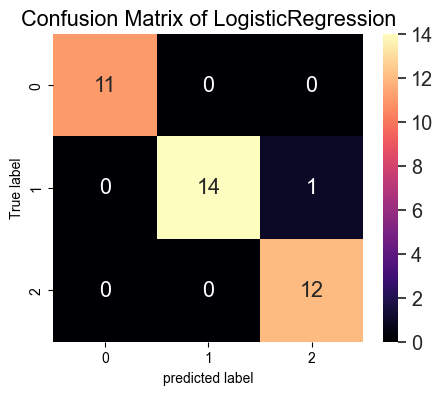

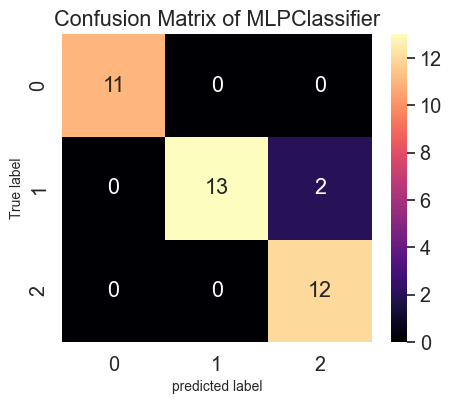

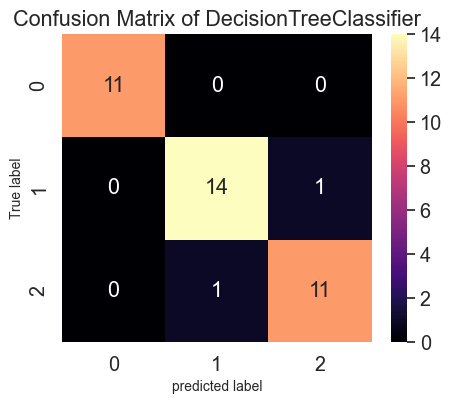

In [5]:
#Output the confusion matrix of the three classifiers 
for clf in [log_clf, mlp_clf, dt_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    matrix_df = pd.DataFrame(confusion_matrix)

    plt.figure(figsize=(5,4))
    ax=plt.axes()
    sns.set(font_scale=1.3)

    sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')
    ax.set_title(f'Confusion Matrix of {clf.__class__.__name__}')
    ax.set_xlabel('predicted label', fontsize=10)
    ax.set_ylabel('True label', fontsize=10)
    plt.show()

In [6]:
#Using voting classifier to ensemble the different classifiers
voting_clf = VotingClassifier([('lr', log_clf),
                               ('mlp', mlp_clf),
                               ('dt', dt_clf)], voting='hard'
                               )
voting_clf.fit(X_train, y_train)
test_pred = voting_clf.predict(X_test)
print(f'{voting_clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')

VotingClassifier, accuracy score = 0.9473684210526315


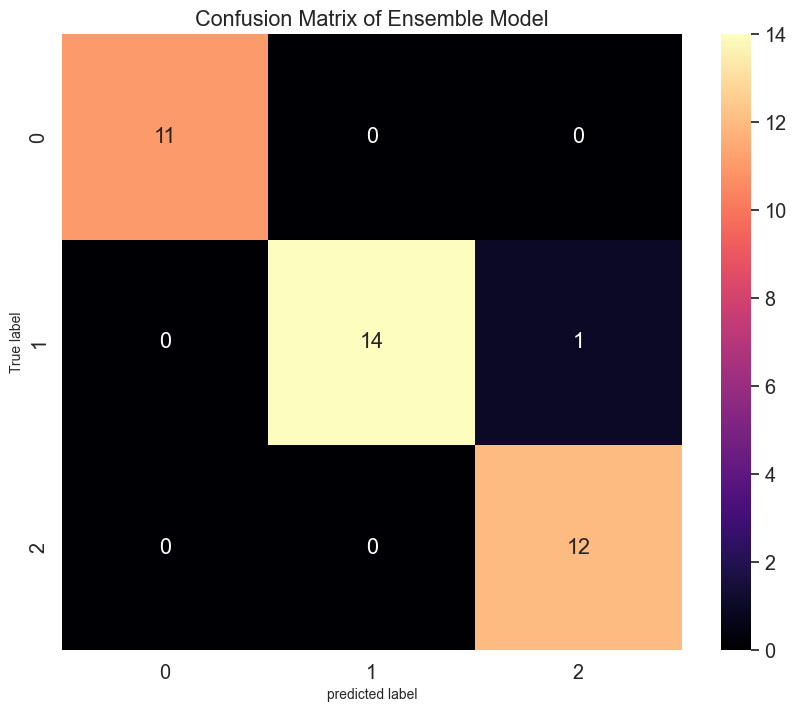

In [7]:
# Create confusion matrix for the ensemble model 
confusion_matrix = metrics.confusion_matrix(y_test, test_pred)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(10,8))
ax=plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')
ax.set_title('Confusion Matrix of Ensemble Model')
ax.set_xlabel('predicted label', fontsize=10)
ax.set_ylabel('True label', fontsize=10)
plt.show()

In [8]:
# Use Bootstrap Aggregating as ensemble method
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(f'{bag_clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')

BaggingClassifier, accuracy score = 0.9473684210526315


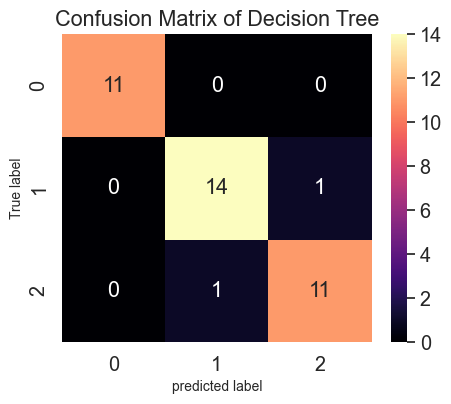

In [9]:
# Establish confusion matrix for the ensemble method
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(5,4))
ax=plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')
ax.set_title('Confusion Matrix of Decision Tree')
ax.set_xlabel('predicted label', fontsize=10)
ax.set_ylabel('True label', fontsize=10)
plt.show()

In [10]:
# Usage of random forest ensemble method
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)
print(f'{RF_clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')

RandomForestClassifier, accuracy score = 0.9473684210526315


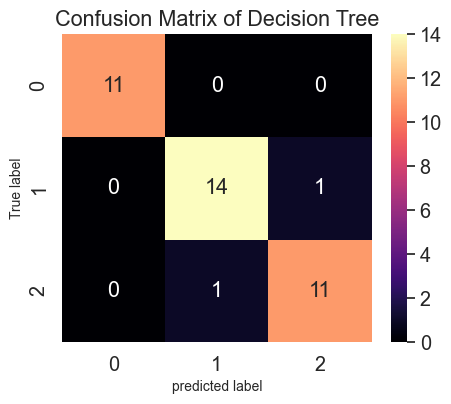

In [11]:
# Output the confusion matrix of the random forest classifier
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(5,4))
ax=plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')
ax.set_title('Confusion Matrix of Decision Tree')
ax.set_xlabel('predicted label', fontsize=10)
ax.set_ylabel('True label', fontsize=10)
plt.show()

In [12]:
# Output the important features for the random forest classifier
f_importance = RF_clf.feature_importances_
features = X.columns
f_imp_dict = {features[i]: f_importance[i] for i in range(len(features))}
sorted_dict = {k: v for k, v in sorted(f_imp_dict.items(), key=lambda item: item[1], reverse=True)}
sorted_features = list(sorted_dict.keys())
print(f'The most important feature is: {sorted_features[0]}')

The most important feature is: petal length (cm)


1. **Low Misclassification Rate**: Having only 1 misclassified sample with the ensemble classifier of logistic regression, MLP, and decision tree indicates that the ensemble model is performing very well on the Iris dataset. This low misclassification rate suggests that the ensemble model is effectively leveraging the strengths of each base classifier to make accurate predictions.

2. **Contribution of Base Classifiers**: Each base classifier in the ensemble (logistic regression, MLP, and decision tree) brings its unique strengths to the table. Logistic regression is known for its simplicity and interpretability, MLP can capture complex nonlinear relationships in the data, and decision trees can handle interactions between features and capture feature importance. By combining these diverse models, the ensemble classifier can better generalize to the dataset.

3. **Differences in Misclassification Rates**: The fact that the ensemble classifier of logistic regression, MLP, and decision tree outperforms bootstrap aggregation and Random Forest in terms of misclassification rate might be attributed to various factors:

   - **Model Diversity**: The ensemble classifier comprising logistic regression, MLP, and decision tree models might be more diverse in terms of their underlying assumptions, learning mechanisms, and decision boundaries compared to bootstrap aggregation and Random Forest. This diversity can lead to better overall performance.
   
   - **Overfitting**: Random Forest, in particular, is prone to overfitting when the number of trees is too high. It's possible that the Random Forest model in your experiment is overfitting to some extent, leading to slightly higher misclassification rates compared to the ensemble classifier with logistic regression, MLP, and decision tree.
   
   - **Hyperparameter Tuning**: The performance of Random Forest and bootstrap aggregation models might also be influenced by the choice of hyperparameters such as the number of trees, maximum depth of trees, and minimum samples per leaf. Ensuring proper hyperparameter tuning could potentially improve the performance of these models.

4. **Considerations for Improvement**: While the results are good overall, it's always worth exploring ways to further improve the performance of your models. This could involve experimenting with different ensemble techniques, fine-tuning hyperparameters, performing feature engineering, or exploring other machine learning algorithms suitable for the Iris dataset.

In summary, the low misclassification rate achieved by the ensemble classifier of logistic regression, MLP, and decision tree models on the Iris dataset demonstrates the effectiveness of ensemble learning in combining diverse base classifiers to improve predictive performance. Additionally, understanding the differences in performance among different ensemble methods can provide valuable insights for further optimization and model selection.
